# Introduction

Welcome to the py-capella-mbse Showcase notebook. This notebook will show you some basic (and not so basic) things that you can get done using this library. For more advanced features have a look around the nearby notebooks.

The below code loads the library and one of the test models:

In [6]:
import capellambse
path_to_model = "../tests/data/melodymodel/5_0/Melody Model Test.aird"
model = capellambse.MelodyModel(path_to_model, jupyter_untrusted=True)
model

Cannot load PVMT extension: ValueError: Provided model does not have a PropertyValuePkg
Property values are not available in this model


The additional `jupyter_untrusted` parameter is there such that GitHub renders diagrams correctly with all defined styles.

Please also ignore the warning above - it indicates that we probed the model for the PVMT extension and it wasn't there, so PVMT-related features will not be available. In some not so distant future this may disapear as we'll be able to inject PVMT into models, but for now, if you want to use PVMT-related features you need to enable PVMT for that model in Capella.

Having said that, lets go to the first practical example of working with the library!

## Example 1: Actor functions

The below code will print every Actor available in the Logical Architecture layer

In [7]:
for actor in model.la.all_actors:
    print(actor.name)

Prof. A. P. W. B. Dumbledore
Prof. S. Snape
Harry J. Potter
R. Weasley
LogicalActor 5
Multiport


but we could also "zoom-in" to an actor of interest:

In [8]:
model.la.all_actors.by_name("Prof. S. Snape")

components,(Empty list)
constraints,(Empty list)
description,Good guy and teacher of brewing arts.
diagrams,(Empty list)
exchanges,"ComponentExchange ""Teacher Responsibilities"" (9cbdd233-aff5-47dd-9bef-9be1277c77c3)"
functions,"LogicalFunction ""teach Potions"" (a7acb298-d14b-4707-a419-fea272434541)LogicalFunction ""maintain a layer of defense for the Sorcerer's Stone"" (4a2a7f3c-d223-4d44-94a7-50dd2906a70c)"
is_abstract,False
is_actor,True
is_human,True
name,Prof. S. Snape
owner,"LogicalComponentPkg ""Structure"" (84c0978d-9a32-4f5b-8013-5b0b6adbfd73)"


We can also turn the above data into a table, for example "actor function allocation", using `pandas`.

For this, we first make sure pandas itself is installed, as well as an extension we'll use later.

In [9]:
%pip install -q pandas openpyxl

Note: you may need to restart the kernel to use updated packages.


Now we can use it together with `capellambse`:

In [10]:
import pandas as pd

data = []
for actor in model.la.all_actors:
    actor_functions = "; ".join([function.name for function in actor.functions] or ["no functions assigned"])
    data.append(dict(actor=actor.name, functions=actor_functions))
df = pd.DataFrame(data)
df

,actor,functions
0,Prof. A. P. W. B. Dumbledore,manage the school; advise Harry
1,Prof. S. Snape,teach Potions; maintain a layer of defense fo...
2,Harry J. Potter,kill He Who Must Not Be Named
3,R. Weasley,assist Harry; break school rules
4,LogicalActor 5,no functions assigned
5,Multiport,LAF 1


and any `pandas.DataFrame` can always be turned into an Excel Spreadsheet, just like that:

In [11]:
df.to_excel("01_intro_actor_functions.xlsx")

you can check the resulting file in the folder next to this notebook (right after you run the above cell)

Now that we've seen the basics, lets do something visually cool.

## Example 2: working with diagrams

The below code will find some diagrams for us.

In [12]:
for diagram in model.la.diagrams.by_type('LAB'):
    print(diagram.name)

[LAB] Wizzard Education
[LAB] Test Component Port Filter


We can analyze which model objects are shown in a particular diagram.

In [13]:
diagram = model.diagrams.by_name('[LAB] Wizzard Education')
diagram.nodes

Unknown global filter 'hide.sequencing.information.filter'
Unknown global filter 'ModelExtensionFilter'
Unknown global filter 'hide.simplified.diagram.based.component.exchanges.filter'
Unknown global filter 'hide.simplified.oriented.grouped.component.exchanges.filter'
Unknown global filter 'hide.simplified.group.of.component.exchanges.filter'


<MixedElementList at 0x00007F3B897EC880 [<FunctionInputPort 'FIP 1' (ef435fb5-de1e-48ca-be00-40c79cc6a659)>, <Part 'Campus' (a3194240-cd17-4998-8f8b-785233487ec3)>, <FunctionInputPort 'FIP 1' (68399bb1-5f8c-4137-89f4-73f25d3bdbe6)>, <LogicalFunction 'advise Harry' (beaf5ba4-8fa9-4342-911f-0266bb29be45)>, <Model element (org.polarsys.capella.core.data.information:PortAllocation) '(Unnamed org.polarsys.capella.core.data.information:PortAllocation)' (74bd0ab3-6a28-4025-822e-90201445a56e)>, <LogicalFunction 'protect Students against the Death Eaters' (264fb47d-67b7-4bdc-8d06-8a0e5139edbf)>, <ComponentExchange 'Punishment' (85a1fb20-38ea-4d77-acd7-90a8c44dc695)>, <Model element (org.polarsys.capella.core.data.information:PortAllocation) '(Unnamed org.polarsys.capella.core.data.information:PortAllocation)' (74bd0ab3-6a28-4025-822e-90201445a56e)>, <Model element (org.polarsys.capella.core.data.information:PortAllocation) '(Unnamed org.polarsys.capella.core.data.information:PortAllocation)' (dda7a62a-f25f-46d8-8f05-867c616914c1)>, <ComponentExchange 'Teacher Responsibilities' (9cbdd233-aff5-47dd-9bef-9be1277c77c3)>, <ComponentPort 'CP 1' (42c60b17-b503-46d6-8b0c-f1ff0fd4b8ac)>, <FunctionOutputPort 'FOP 1' (68c5f3da-1ccc-417d-8a17-3a3764167d77)>, <FunctionOutputPort 'FOP 1' (0eae1038-95fe-48b7-af6f-ad6890f2c207)>, <LogicalFunction 'defend the surrounding area against Intruders' (7f2936ab-0b54-4e92-9f0c-85a9f0981959)>, <ComponentExchange 'Headmaster Responsibilities' (c0bc49e1-8043-4418-8c0a-de6c6b749eab)>, <ComponentPort 'CP 1' (db5681e4-4245-4207-a429-e89979f6ac71)>, <Model element (org.polarsys.capella.core.data.information:PortAllocation) '(Unnamed org.polarsys.capella.core.data.information:PortAllocation)' (fee1fff5-d751-401b-bb3c-2114a74f0c8a)>, <ComponentPort 'CP 2' (fcbf6881-720c-421f-9fe9-12fc3dfefe9c)>, <FunctionOutputPort 'FOP 1' (46093fb9-ae5e-4cc9-aad4-70c33e82e2bc)>, <ComponentPort 'CP 2' (438d9f44-8c6a-4151-98cc-360d8aa4f69f)>, <ComponentPort 'CP 3' (e0dcf8c2-2283-4456-98a2-146e78ba5f26)>, <Model element (org.polarsys.capella.core.data.information:PortAllocation) '(Unnamed org.polarsys.capella.core.data.information:PortAllocation)' (3ed5ae4f-8a4e-4690-9088-655990a1b77b)>, <FunctionalExchange 'friendship' (1bbb9b2d-517c-4f77-a35c-b3aa3f9422b8)>, <Model element (org.polarsys.capella.core.data.information:PortAllocation) '(Unnamed org.polarsys.capella.core.data.information:PortAllocation)' (a4e2bf11-0705-4f20-bf73-5fa5519954f7)>, <FunctionalExchange 'wizardry' (6545a77d-d224-4662-a5b2-3c016b78e33d)>, <ComponentPort 'CP 2' (639341a3-1b08-44d9-bac2-cd847ccb45a4)>, <LogicalFunction 'kill He Who Must Not Be Named' (aa9931e3-116c-461e-8215-6b9fdbdd4a1b)>, <FunctionalExchange 'punish' (96a0cf4c-adfe-4490-92d1-bcf75ee77004)>, <Model element (org.polarsys.capella.core.data.information:PortAllocation) '(Unnamed org.polarsys.capella.core.data.information:PortAllocation)' (299b98b8-8716-4dbc-bc7e-4b9349778c26)>, <ComponentExchange 'Learning' (3b3fc202-be5c-49ae-bf2f-1d61daf3bb50)>, <Part 'Hogwarts' (101ffa60-f8a2-4ea2-a0d8-d10910ceac06)>, <Part 'Harry J. Potter' (26543596-7646-4d81-8f15-c4e01ec930a7)>, <Part 'Whomping Willow' (1188fc31-789b-424f-a2d4-06791873a351)>, <LogicalFunction 'educate Wizards' (957c5799-1d4a-4ac0-b5de-33a65bf1519c)>, <ComponentPort 'CP 3' (d7e0cc4d-eef6-4173-9a21-1bd933a5d9f0)>, <LogicalFunction 'teach  Potions' (a7acb298-d14b-4707-a419-fea272434541)>, <Model element (org.polarsys.capella.core.data.information:PortAllocation) '(Unnamed org.polarsys.capella.core.data.information:PortAllocation)' (0f6e1aa0-942a-40a9-930f-c7df34b9d8eb)>, <ComponentPort 'CP 1' (fd38ff24-6a77-446b-aab5-6e307295b825)>, <FunctionalExchange 'assistance' (241f3901-11f0-4b00-a903-ed158cce73de)>, <Model element (org.polarsys.capella.core.data.information:PortAllocation) '(Unnamed org.polarsys.capella.core.data.information:PortAllocation)' (6d882e28-4208-41d0-b8a5-3a19e1805a34)>, <Model element (org.polarsys.capella.core.data.information:Po

And again there are warnings - there are quite a few visual filters in Capella and we are not handling all of those yet but mostly those that are used in our projects. The filter coverage will eventally improve, stay tuned.

And finally, you can display the diagram right in the notebook.

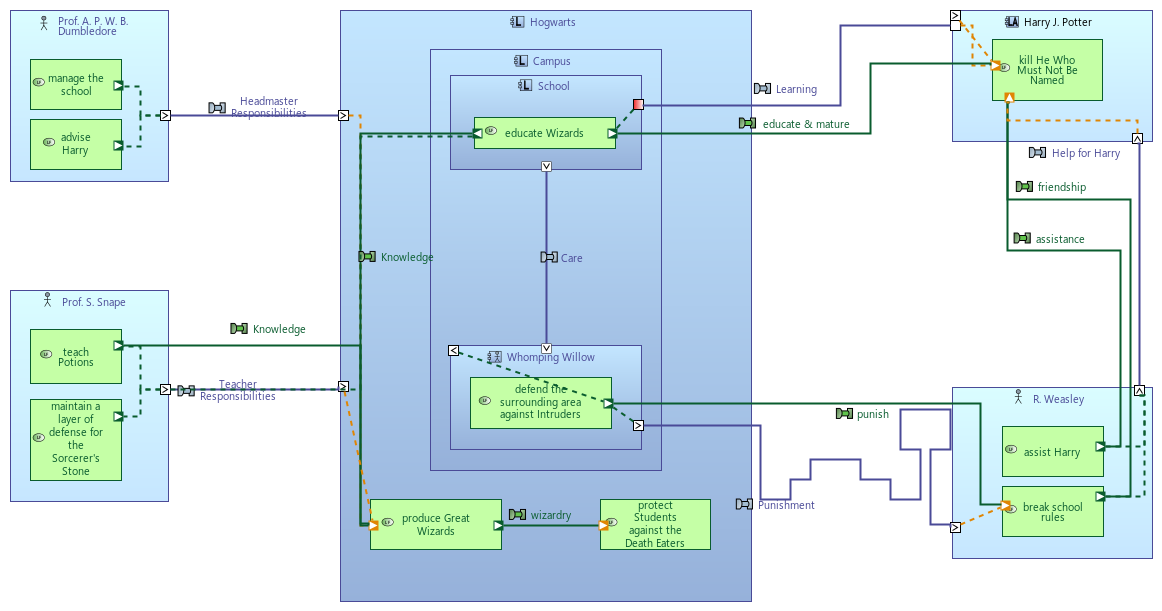

In [14]:
diagram

We use SVG diagrams a lot since they look great in documentation, are zoomable, even interactive sometimes and really light-weight. To make integrating them into a pipeline easier, we also support some derived formats, which you can access using `.as_<format>` style attributes, see below for a handful of useful examples.

If you need an entirely different format from SVG, such as PNG or JPEG, there are quite a few examples of how to get there on stackoverflow (like [Convert SVG to PNG in Python](https://stackoverflow.com/questions/6589358/convert-svg-to-png-in-python)).

In [15]:
print(diagram.as_svg[:110] + "...")  # The raw SVG format as simple python `str`
print(diagram.as_datauri_svg[:110] + "...")  # An SVG, base64-encoded as `data:` URI
print(diagram.as_html_img[:110] + "...")  # An HTML `<img>` tag, using the above `data:` URI as `src`

<svg baseProfile="full" class="LogicalArchitectureBlank" height="611" version="1.1" viewBox="15 15 1162 611" w...
data:image/svg+xml;base64,PHN2ZyBiYXNlUHJvZmlsZT0iZnVsbCIgY2xhc3M9IkxvZ2ljYWxBcmNoaXRlY3R1cmVCbGFuayIgaGVpZ2h0...
<img src="data:image/svg+xml;base64,PHN2ZyBiYXNlUHJvZmlsZT0iZnVsbCIgY2xhc3M9IkxvZ2ljYWxBcmNoaXRlY3R1cmVCbGFuay...


Lets now try something else - we check if function port has any protocols (state machines) underneath:

In [16]:
fnc = model.la.all_functions.by_name("defend the surrounding area against Intruders")
stms = fnc.outputs[0].state_machines
stms

<CoupledElementList at 0x00007F3B5167BE20 [<StateMachine 'FaultStates' (06cefb2b-534e-4453-9aba-fe53329197ad)>]>

and we can also check what states it could have:

In [17]:
stms[0].regions[0].states

<ElementList at 0x00007F3B5218CE50 [<State 'normal defence' (e494e247-efce-4258-9cc6-fd799dbb0adf)>, <State 'erroneous defence' (81f3de46-4596-41b0-8569-c3c21161a2f6)>, <State 'no defence' (5b6a03d8-0ef9-4b2b-9a50-a745f490d663)>]>

This concludes our introduction. There is a lot more you can do with the library - feel free to explore the examples collection or create an issue to ask for a specific use-case example and you may see it around pretty soon.